# Datasets analysis and comparison

The aim of this notebook is to describe the two datasets subjects of our work and to compare them in order to check whether there exists differences between them in the input space.

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import re

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm


p = os.path.abspath('../')
if p not in sys.path:
    sys.path.append(p)
    
q = os.path.abspath('../../')
if q not in sys.path:
    sys.path.append(q)
from preprocess import SkeletonDataset

In [2]:
src_dir = '/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/1mm/SC/no_mask/Rdistmaps/'

### Loading of datasets

#### 1) HCP

In [3]:
distmaps = np.load(src_dir + 'distmap_1mm.npy', mmap_mode='r')
filenames = np.load(os.path.join(src_dir, "sub_id.npy"))

#### 2) OH 

In [17]:
data_dir = "/neurospin/dico/data/deep_folding/current/datasets/one_handed/crops/SC/no_mask/Rdistmaps/"
distmaps_oh= np.load(os.path.join(data_dir, "distmap_1mm.npy"), mmap_mode='r')
filenames_oh = np.load(os.path.join(data_dir, "sub_id.npy"))

#### 3) EUAIMS 

In [5]:
data_dir = "/neurospin/dico/data/deep_folding/current/datasets/euaims/crops/SC/no_mask/Rdistmaps/"
distmaps_aims = np.load(os.path.join(data_dir, "distmap_1mm.npy"), mmap_mode='r')
filenames_aims = np.load(os.path.join(data_dir, "sub_id.npy"))

In [20]:
subset_sc = SkeletonDataset(dataframe=distmaps, filenames=filenames, data_transforms=False)
subset_aims = SkeletonDataset(dataframe=distmaps_aims, filenames=filenames_aims, data_transforms=False)
subset_oh = SkeletonDataset(dataframe=distmaps_oh, filenames=filenames_oh, data_transforms=False)

In [21]:
sc_loader = torch.utils.data.DataLoader(
                          subset_sc,
                          batch_size=1114,
                          num_workers=8,
                          shuffle=False)

aims_loader = torch.utils.data.DataLoader(
                          subset_aims,
                          batch_size=844,
                          num_workers=8,
                          shuffle=False)

oh_loader = torch.utils.data.DataLoader(
                           subset_oh,
                           batch_size=56,
                           num_workers=8,
                           shuffle=False)

In [8]:
for inputs, path in tqdm(sc_loader):
    X_sc_preprocessed = inputs

100%|██████████| 1/1 [01:25<00:00, 85.86s/it]


In [9]:
for inputs, path in tqdm(aims_loader):
    X_aims_preprocessed = inputs

100%|██████████| 1/1 [01:05<00:00, 65.73s/it]


In [22]:
for inputs, path in tqdm(oh_loader):
    X_oh_preprocessed = inputs

100%|██████████| 1/1 [00:04<00:00,  4.75s/it]


In [11]:
X_sc_preprocessed = X_sc_preprocessed.numpy().squeeze()
X_aims_preprocessed = X_aims_preprocessed.numpy().squeeze()
X_oh_preprocessed = X_oh_preprocessed.numpy().squeeze()

In [12]:
X_proc = np.array([X_sc_preprocessed[k].flatten() for k in range(len(X_sc_preprocessed))] + [X_aims_preprocessed[k].flatten() for k in range(len(X_aims_preprocessed))]+ [X_oh_preprocessed[k].flatten() for k in range(len(X_oh_preprocessed))])
X_embedded_proc = TSNE(n_components=2).fit_transform(X_proc)
label = ['SC' for k in range(len(X_sc_preprocessed))] + ['aims' for k in range(len(X_aims_preprocessed))] + ['oh' for k in range(len(X_oh_preprocessed))]

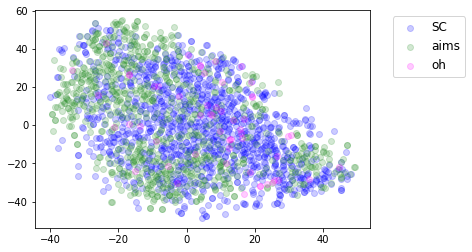

In [13]:
color_dict = {'SC': 'blue', 'aims': 'forestgreen', 'oh': 'magenta'}
arr = X_embedded_proc

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(label):
    ix = np.where(np.array(label) == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    ax.scatter(x, y, c = color_dict[g], label = g, alpha=0.2)


#plt.axis('off')    
ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

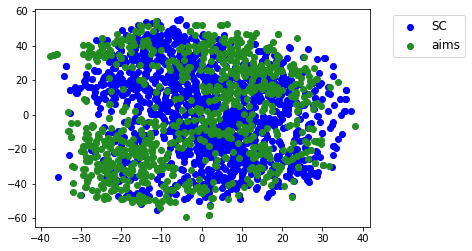

In [14]:
X_proc = np.array([X_sc_preprocessed[k].flatten() for k in range(len(X_sc_preprocessed))] + [X_aims_preprocessed[k].flatten() for k in range(len(X_aims_preprocessed))])
X_embedded_proc = TSNE(n_components=2).fit_transform(X_proc)
label = ['SC' for k in range(len(X_sc_preprocessed))] + ['aims' for k in range(len(X_aims_preprocessed))] 
                  
color_dict = {'SC': 'blue', 'aims': 'forestgreen', 'oh': 'magenta'}
arr = X_embedded_proc

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(label):
    ix = np.where(np.array(label) == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    ax.scatter(x, y, c = color_dict[g], label = g)


#plt.axis('off')    
ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

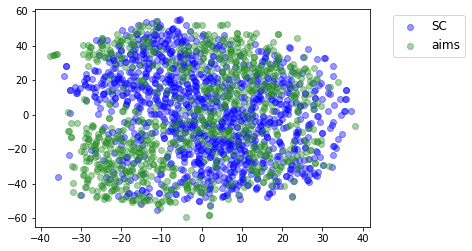

In [15]:
label = ['SC' for k in range(len(X_sc_preprocessed))] + ['aims' for k in range(len(X_aims_preprocessed))] 
                  
color_dict = {'SC': 'blue', 'aims': 'forestgreen', 'oh': 'magenta'}
arr = X_embedded_proc

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(label):
    ix = np.where(np.array(label) == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    ax.scatter(x, y, c = color_dict[g], label = g, alpha=0.4)


#plt.axis('off')    
ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

### OH vs HCP

In [24]:
X_sc_preprocessed = X_sc_preprocessed.numpy().squeeze()
X_oh_preprocessed = X_oh_preprocessed.numpy().squeeze()

In [25]:
X_proc = np.array([X_sc_preprocessed[k].flatten() for k in range(len(X_sc_preprocessed))] + [X_oh_preprocessed[k].flatten() for k in range(len(X_oh_preprocessed))])
X_embedded_proc = TSNE(n_components=2, perplexity=50).fit_transform(X_proc)
label = ['SC' for k in range(len(X_sc_preprocessed))] + ['oh' for k in range(len(X_oh_preprocessed))]

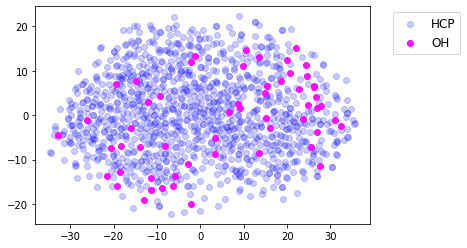

In [26]:
color_dict = {'SC': 'blue', 'oh': 'magenta'}
arr = X_embedded_proc_rot_ctrl

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(label):
    ix = np.where(np.array(label) == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    if g=='SC':
        ax.scatter(x, y, c = color_dict[g], label = 'HCP', alpha=0.2)
    else:
        ax.scatter(x, y, c = color_dict[g], label = 'OH', alpha=0.9)
#plt.axis('off')    
ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

In [27]:
X_oh_preprocessed.shape

(56, 80, 80, 96)

In [36]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X_proc, np.array(label), test_size=0.33, random_state=42, stratify=label)

clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))              

              precision    recall  f1-score   support

          SC       0.96      1.00      0.98       368
          oh       0.75      0.16      0.26        19

    accuracy                           0.96       387
   macro avg       0.85      0.58      0.62       387
weighted avg       0.95      0.96      0.94       387



In [42]:
X_classif = np.array([X_sc_preprocessed[k].flatten() for k in range(56)] + [X_oh_preprocessed[k].flatten() for k in range(len(X_oh_preprocessed))])
label_classif = np.array(['SC' for k in range(56)] + ['oh' for k in range(len(X_oh_preprocessed))])
X_train, X_test, y_train, y_test = train_test_split(X_classif, label_classif, test_size=0.33, random_state=42, stratify=label_classif)

clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))    

              precision    recall  f1-score   support

          SC       0.61      0.58      0.59        19
          oh       0.58      0.61      0.59        18

    accuracy                           0.59        37
   macro avg       0.60      0.60      0.59        37
weighted avg       0.60      0.59      0.59        37



In [41]:
X_oh_preprocessed.shape

(56, 80, 80, 96)

### AIMS using only controls

In [43]:
labels_aims = pd.read_csv('/neurospin/dico/lguillon/aims_detection/list_subjects.csv')
ctrl = labels_aims[labels_aims['group']==1]
asd = labels_aims[labels_aims['group']==2]
id_ctrl = labels_aims[labels_aims['group']==3]

data_dir = "/neurospin/dico/data/deep_folding/current/datasets/euaims/crops/SC/no_mask/Rdistmaps/"
filenames_aims = np.load(os.path.join(data_dir, "sub_id.npy"))
filenames_aims = np.array([re.search('\d{12}', filenames_aims[k]).group(0) for k in range(len(filenames_aims))])

distmaps_ctrl = np.load(os.path.join(data_dir, "distmap_1mm.npy"), mmap_mode='r')
distmaps_asd = np.load(os.path.join(data_dir, "distmap_1mm.npy"), mmap_mode='r')
distmaps_id_ctrl = np.load(os.path.join(data_dir, "distmap_1mm.npy"), mmap_mode='r')

ctrl_list = [str(sub) for sub in ctrl.ID if str(sub) in filenames_aims]
ctrl_list = np.array(ctrl_list)
sorter = np.argsort(filenames_aims)
filenames_idx = sorter[np.searchsorted(filenames_aims, ctrl_list, sorter=sorter)]
filenames_ctrl = filenames_aims[filenames_idx]
filenames_ctrl = np.array([re.search('\d{12}', filenames_ctrl[k]).group(0) for k in range(len(filenames_ctrl))])
distmaps_ctrl = distmaps_ctrl[filenames_idx]

In [44]:
subset_sc = SkeletonDataset(dataframe=distmaps, filenames=filenames, data_transforms=False)
subset_aims_ctrl = SkeletonDataset(dataframe=distmaps_ctrl, filenames=filenames_ctrl, data_transforms=False)

In [45]:
sc_loader = torch.utils.data.DataLoader(
                          subset_sc,
                          batch_size=1114,
                          num_workers=8,
                          shuffle=False)

aims_loader = torch.utils.data.DataLoader(
                          subset_aims_ctrl,
                          batch_size=844,
                          num_workers=8,
                          shuffle=False)

In [7]:
for inputs, path in tqdm(sc_loader):
    X_sc_preprocessed = inputs

100%|██████████| 1/1 [01:21<00:00, 81.10s/it]


In [46]:
for inputs, path in tqdm(aims_loader):
    X_aims_preprocessed = inputs

100%|██████████| 1/1 [00:19<00:00, 19.01s/it]


In [47]:
X_sc_preprocessed = X_sc_preprocessed.numpy().squeeze()
X_aims_preprocessed = X_aims_preprocessed.numpy().squeeze()

In [48]:
X_proc_rot_ctrl = np.array([X_sc_preprocessed[k].flatten() for k in range(len(X_sc_preprocessed))] + [X_aims_preprocessed[k].flatten() for k in range(len(X_aims_preprocessed))])

In [50]:
X_embedded_proc_rot_ctrl = TSNE(n_components=2, perplexity=50).fit_transform(X_proc_rot_ctrl)
label = ['SC' for k in range(len(X_sc_preprocessed))] + ['aims' for k in range(len(X_aims_preprocessed))] 

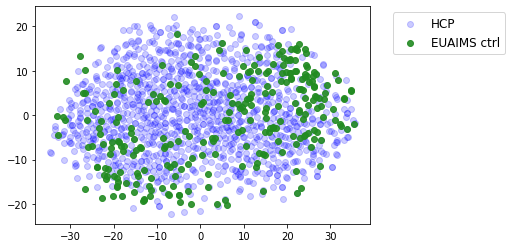

In [14]:
color_dict = {'SC': 'blue', 'aims': 'forestgreen', 'oh': 'magenta'}
arr = X_embedded_proc_rot_ctrl

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(label):
    ix = np.where(np.array(label) == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    if g=='SC':
        ax.scatter(x, y, c = color_dict[g], label = 'HCP', alpha=0.2)
    else:
        ax.scatter(x, y, c = color_dict[g], label = 'EUAIMS ctrl', alpha=0.9)
#plt.axis('off')    
ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

In [16]:
X_sc_preprocessed.shape

(1114, 80, 80, 96)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_proc_rot_ctrl, np.array(label), test_size=0.33, random_state=42, stratify=label)

clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))    

              precision    recall  f1-score   support

          SC       0.93      0.94      0.93       368
        aims       0.74      0.68      0.71        88

    accuracy                           0.89       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.89      0.89      0.89       456



In [52]:
X_aims_preprocessed.shape

(266, 80, 80, 96)

In [55]:
X_classif = np.array([X_sc_preprocessed[k].flatten() for k in range(266)] + [X_aims_preprocessed[k].flatten() for k in range(len(X_aims_preprocessed))])
label_classif = np.array(['SC' for k in range(266)] + ['aims' for k in range(len(X_aims_preprocessed))])
X_train, X_test, y_train, y_test = train_test_split(X_classif, label_classif, test_size=0.33, random_state=42, stratify=label_classif)

clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))    

              precision    recall  f1-score   support

          SC       0.82      0.88      0.85        88
        aims       0.87      0.81      0.84        88

    accuracy                           0.84       176
   macro avg       0.84      0.84      0.84       176
weighted avg       0.84      0.84      0.84       176



### AIMS using only controls and rotations on HCP

In [32]:
labels_aims = pd.read_csv('/neurospin/dico/lguillon/aims_detection/list_subjects.csv')
ctrl = labels_aims[labels_aims['group']==1]
asd = labels_aims[labels_aims['group']==2]
id_ctrl = labels_aims[labels_aims['group']==3]

data_dir = "/neurospin/dico/data/deep_folding/current/datasets/euaims/crops/SC/no_mask/Rdistmaps/"
filenames_aims = np.load(os.path.join(data_dir, "sub_id.npy"))
filenames_aims = np.array([re.search('\d{12}', filenames_aims[k]).group(0) for k in range(len(filenames_aims))])

distmaps_ctrl = np.load(os.path.join(data_dir, "distmap_1mm.npy"), mmap_mode='r')
distmaps_asd = np.load(os.path.join(data_dir, "distmap_1mm.npy"), mmap_mode='r')
distmaps_id_ctrl = np.load(os.path.join(data_dir, "distmap_1mm.npy"), mmap_mode='r')

ctrl_list = [str(sub) for sub in ctrl.ID if str(sub) in filenames_aims]
ctrl_list = np.array(ctrl_list)
sorter = np.argsort(filenames_aims)
filenames_idx = sorter[np.searchsorted(filenames_aims, ctrl_list, sorter=sorter)]
filenames_ctrl = filenames_aims[filenames_idx]
filenames_ctrl = np.array([re.search('\d{12}', filenames_ctrl[k]).group(0) for k in range(len(filenames_ctrl))])
distmaps_ctrl = distmaps_ctrl[filenames_idx]

In [33]:
subset_sc = SkeletonDataset(dataframe=distmaps, filenames=filenames, data_transforms=True)
subset_aims_ctrl = SkeletonDataset(dataframe=distmaps_ctrl, filenames=filenames_ctrl, data_transforms=False)

In [34]:
sc_loader = torch.utils.data.DataLoader(
                          subset_sc,
                          batch_size=1114,
                          num_workers=8,
                          shuffle=False)

aims_loader = torch.utils.data.DataLoader(
                          subset_aims_ctrl,
                          batch_size=844,
                          num_workers=8,
                          shuffle=False)

In [35]:
for inputs, path in tqdm(sc_loader):
    X_sc_preprocessed = inputs

  0%|          | 0/1 [00:00<?, ?it/s]Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f935b12ee48>>
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/casa/home/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.6/multiprocessing/process.py", line 134, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f935b122518>>
Traceback (most recent call last):
  File "/casa/home/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py"

In [37]:
for inputs, path in tqdm(aims_loader):
    X_aims_preprocessed = inputs

100%|██████████| 1/1 [01:01<00:00, 61.69s/it]


In [58]:
X_sc_preprocessed = X_sc_preprocessed.numpy().squeeze()
X_aims_preprocessed = X_aims_preprocessed.numpy().squeeze()

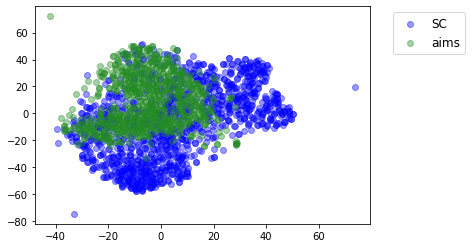

In [60]:
X_proc_rot_ctrl = np.array([X_sc_preprocessed[k].flatten() for k in range(len(X_sc_preprocessed))] + [X_aims_preprocessed[k].flatten() for k in range(len(X_aims_preprocessed))])
X_embedded_proc_rot_ctrl = TSNE(n_components=2).fit_transform(X_proc_rot_ctrl)
label = ['SC' for k in range(len(X_sc_preprocessed))] + ['aims' for k in range(len(X_aims_preprocessed))] 
                  
color_dict = {'SC': 'blue', 'aims': 'forestgreen', 'oh': 'magenta'}
arr = X_embedded_proc_rot_ctrl

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(label):
    ix = np.where(np.array(label) == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    ax.scatter(x, y, c = color_dict[g], label = g, alpha=0.4)


#plt.axis('off')    
ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

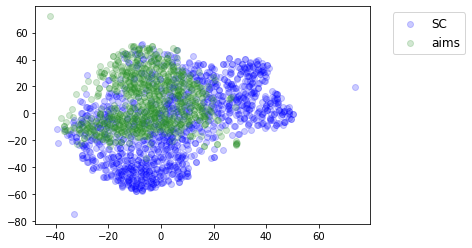

In [62]:
color_dict = {'SC': 'blue', 'aims': 'forestgreen', 'oh': 'magenta'}
arr = X_embedded_proc_rot_ctrl

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(label):
    ix = np.where(np.array(label) == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    ax.scatter(x, y, c = color_dict[g], label = g, alpha=0.2)


#plt.axis('off')    
ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

### In the latent space

#### OH

In [56]:
data_dir = "/neurospin/dico/lguillon/distmap/analyses_gridsearch/75_2/"
df_encoded_hcp = pd.read_pickle(os.path.join(data_dir, "encoded_hcp.pkl"))
df_encoded_oh = pd.read_pickle(os.path.join(data_dir, "encoded_oh.pkl"))
aims_data = pd.read_pickle(os.path.join(data_dir, "encoded_aims.pkl"))

In [85]:
X = np.array(list(df_encoded_hcp['latent']) + list(df_encoded_oh['latent']))
labels = ['hcp' for k in range(len(df_encoded_hcp))] + ['oh' for k in range(len(df_encoded_oh))]

X_embedded = TSNE(n_components=2, random_state=12, perplexity=40).fit_transform(X)

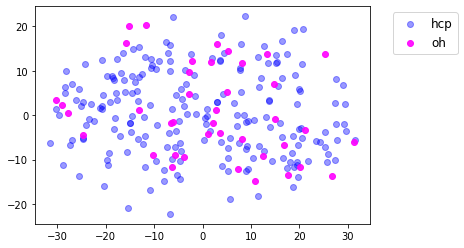

In [61]:
color_dict = {'hcp': 'blue', 'aims': 'forestgreen', 'oh': 'magenta'}
arr = X_embedded_proc_rot_ctrl

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(labels):
    ix = np.where(np.array(labels) == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    if g=='hcp':
        ax.scatter(x, y, c = color_dict[g], label = g, alpha=0.4)
    else:
        ax.scatter(x, y, c = color_dict[g], label = g, alpha=0.9)

#plt.axis('off')    
ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(labels), test_size=0.33, random_state=42, stratify=labels)

clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

         hcp       0.92      0.88      0.90        69
          oh       0.50      0.62      0.55        13

    accuracy                           0.84        82
   macro avg       0.71      0.75      0.73        82
weighted avg       0.86      0.84      0.85        82



In [81]:
X = np.array(list(df_encoded_hcp['latent'][:40]) + list(df_encoded_oh['latent']))
labels = ['hcp' for k in range(40)] + ['oh' for k in range(len(df_encoded_oh))]
X_embedded = TSNE(n_components=2, random_state=12, perplexity=40).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_embedded, np.array(labels), test_size=0.33, random_state=42, stratify=labels)

clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

         hcp       0.64      0.50      0.56        14
          oh       0.56      0.69      0.62        13

    accuracy                           0.59        27
   macro avg       0.60      0.60      0.59        27
weighted avg       0.60      0.59      0.59        27



/casa/home/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### AIMS

In [82]:
X = np.array(list(df_encoded_hcp['latent']) + list(aims_data[aims_data.Group=='ctrl']['latent']))
labels = ['hcp' for k in range(len(df_encoded_hcp))] + ['EUAIMS ctrl' for k in range(len(aims_data[aims_data.Group=='ctrl']))]

X_embedded = TSNE(n_components=2, random_state=12, perplexity=40).fit_transform(X)

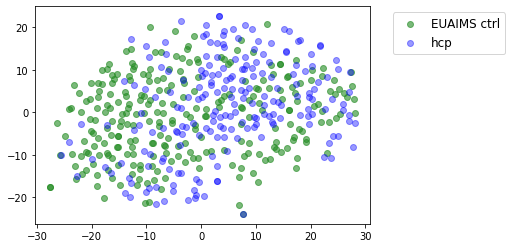

In [75]:
color_dict = {'hcp': 'blue', 'EUAIMS ctrl': 'forestgreen', 'oh': 'magenta'}
arr = X_embedded

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(labels):
    ix = np.where(np.array(labels) == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    if g=='hcp':
        ax.scatter(x, y, c = color_dict[g], label = g, alpha=0.4)
    else:
        ax.scatter(x, y, c = color_dict[g], label = g, alpha=0.6)

#plt.axis('off')    
ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_embedded, np.array(labels), test_size=0.33, random_state=42, stratify=labels)

clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

 EUAIMS ctrl       0.59      0.93      0.72        88
         hcp       0.65      0.16      0.26        69

    accuracy                           0.59       157
   macro avg       0.62      0.55      0.49       157
weighted avg       0.61      0.59      0.52       157



/casa/home/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(labels), test_size=0.33, random_state=42, stratify=labels)

clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

 EUAIMS ctrl       0.72      0.86      0.79        88
         hcp       0.77      0.58      0.66        69

    accuracy                           0.74       157
   macro avg       0.75      0.72      0.72       157
weighted avg       0.74      0.74      0.73       157



/casa/home/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Site effect AIMS

In [95]:
labels_aims = pd.read_csv('/neurospin/dico/lguillon/aims_detection/info_subjects.csv')
c_rome = labels_aims[labels_aims['t1_diagnosis']=='Control'][labels_aims['t1_site']=='Rome']
c_cam = labels_aims[labels_aims['t1_diagnosis']=='Control'][labels_aims['t1_site']=='Cambridge']
c_kcl = labels_aims[labels_aims['t1_diagnosis']=='Control'][labels_aims['t1_site']=='KCL']
c_man = labels_aims[labels_aims['t1_diagnosis']=='Control'][labels_aims['t1_site']=='Mannheim']
c_nij = labels_aims[labels_aims['t1_diagnosis']=='Control'][labels_aims['t1_site']=='Nijmegen']
c_ut = labels_aims[labels_aims['t1_diagnosis']=='Control'][labels_aims['t1_site']=='Utrecht']
#asd = labels_aims[labels_aims['group']==2]
#id_ctrl = labels_aims[labels_aims['group']==3]

data_dir = "/neurospin/dico/data/deep_folding/current/datasets/euaims/crops/SC/no_mask/Rdistmaps/"
filenames_aims = np.load(os.path.join(data_dir, "sub_id.npy"))
filenames_aims = np.array([re.search('\d{12}', filenames_aims[k]).group(0) for k in range(len(filenames_aims))])

distmaps_ctrl = np.load(os.path.join(data_dir, "distmap_1mm.npy"), mmap_mode='r')

rome_list = [str(sub) for sub in c_rome.subjects if str(sub) in filenames_aims]
rome_list = np.array(rome_list)
sorter = np.argsort(filenames_aims)
filenames_idx = sorter[np.searchsorted(filenames_aims, rome_list, sorter=sorter)]
filenames_rome = filenames_aims[filenames_idx]
filenames_rome = np.array([re.search('\d{12}', filenames_rome[k]).group(0) for k in range(len(filenames_rome))])
distmaps_rome = distmaps_ctrl[filenames_idx]

cam_list = [str(sub) for sub in c_cam.subjects if str(sub) in filenames_aims]
cam_list = np.array(cam_list)
sorter = np.argsort(filenames_aims)
filenames_idx = sorter[np.searchsorted(filenames_aims, cam_list, sorter=sorter)]
filenames_cam = filenames_aims[filenames_idx]
filenames_cam = np.array([re.search('\d{12}', filenames_cam[k]).group(0) for k in range(len(filenames_cam))])
distmaps_cam = distmaps_ctrl[filenames_idx]

kcl_list = [str(sub) for sub in c_kcl.subjects if str(sub) in filenames_aims]
kcl_list = np.array(kcl_list)
sorter = np.argsort(filenames_aims)
filenames_idx = sorter[np.searchsorted(filenames_aims, kcl_list, sorter=sorter)]
filenames_kcl = filenames_aims[filenames_idx]
filenames_kcl = np.array([re.search('\d{12}', filenames_kcl[k]).group(0) for k in range(len(filenames_kcl))])
distmaps_kcl = distmaps_ctrl[filenames_idx]

man_list = [str(sub) for sub in c_man.subjects if str(sub) in filenames_aims]
man_list = np.array(man_list)
sorter = np.argsort(filenames_aims)
filenames_idx = sorter[np.searchsorted(filenames_aims, man_list, sorter=sorter)]
filenames_man = filenames_aims[filenames_idx]
filenames_man = np.array([re.search('\d{12}', filenames_man[k]).group(0) for k in range(len(filenames_man))])
distmaps_man = distmaps_ctrl[filenames_idx]

nij_list = [str(sub) for sub in c_nij.subjects if str(sub) in filenames_aims]
nij_list = np.array(nij_list)
sorter = np.argsort(filenames_aims)
filenames_idx = sorter[np.searchsorted(filenames_aims, nij_list, sorter=sorter)]
filenames_nij = filenames_aims[filenames_idx]
filenames_nij = np.array([re.search('\d{12}', filenames_nij[k]).group(0) for k in range(len(filenames_nij))])
distmaps_nij = distmaps_ctrl[filenames_idx]

ut_list = [str(sub) for sub in c_ut.subjects if str(sub) in filenames_aims]
ut_list = np.array(ut_list)
sorter = np.argsort(filenames_aims)
filenames_idx = sorter[np.searchsorted(filenames_aims, ut_list, sorter=sorter)]
filenames_ut = filenames_aims[filenames_idx]
filenames_ut = np.array([re.search('\d{12}', filenames_ut[k]).group(0) for k in range(len(filenames_ut))])
distmaps_ut = distmaps_ctrl[filenames_idx]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [96]:
subset_rome = SkeletonDataset(dataframe=distmaps_rome, filenames=filenames_rome, data_transforms=False)
subset_cam = SkeletonDataset(dataframe=distmaps_cam, filenames=filenames_cam, data_transforms=False)
subset_kcl = SkeletonDataset(dataframe=distmaps_kcl, filenames=filenames_kcl, data_transforms=False)
subset_man = SkeletonDataset(dataframe=distmaps_man, filenames=filenames_man, data_transforms=False)
subset_nij = SkeletonDataset(dataframe=distmaps_nij, filenames=filenames_nij, data_transforms=False)
subset_ut = SkeletonDataset(dataframe=distmaps_ut, filenames=filenames_ut, data_transforms=False)

In [103]:
rome_loader = torch.utils.data.DataLoader(
                          subset_rome,
                          batch_size=19,
                          num_workers=8,
                          shuffle=False)

cam_loader = torch.utils.data.DataLoader(
                          subset_cam,
                          batch_size=33,
                          num_workers=8,
                          shuffle=False)
kcl_loader = torch.utils.data.DataLoader(
                          subset_kcl,
                          batch_size=92,
                          num_workers=8,
                          shuffle=False)

man_loader = torch.utils.data.DataLoader(
                          subset_man,
                          batch_size=37,
                          num_workers=8,
                          shuffle=False)
nij_loader = torch.utils.data.DataLoader(
                          subset_nij,
                          batch_size=74,
                          num_workers=8,
                          shuffle=False)

ut_loader = torch.utils.data.DataLoader(
                          subset_ut,
                          batch_size=45,
                          num_workers=8,
                          shuffle=False)

In [361]:
X_rome, X_cam, X_kcl, X_man, X_nij, X_ut = [], [], [], [], [], []
for loader, X in zip([rome_loader, cam_loader, kcl_loader, man_loader, nij_loader, ut_loader],
                     [X_rome, X_cam, X_kcl, X_man, X_nij, X_ut]):
    for inputs, path in tqdm(loader):
        X.append(inputs)  

100%|██████████| 1/1 [00:04<00:00,  4.48s/it]


In [362]:
X_rome_arr, X_cam_arr, X_kcl_arr, X_man_arr, X_nij_arr, X_ut_arr = [], [], [], [], [], []

for X, X_arr in zip([X_rome, X_cam, X_kcl, X_man, X_nij, X_ut],
             [X_rome_arr, X_cam_arr, X_kcl_arr, X_man_arr, X_nij_arr, X_ut_arr]):
    X = X[0]
    X_arr.append(X.numpy().squeeze())
    print(X_arr[0].shape)

(19, 80, 80, 96)
(33, 80, 80, 96)
(92, 80, 80, 96)
(37, 80, 80, 96)
(74, 80, 80, 96)
(45, 80, 80, 96)


In [363]:
X_rome_flat, X_cam_flat, X_kcl_flat, X_man_flat, X_nij_flat, X_ut_flat = [], [], [], [], [], []

for X_arr, X_flat in zip([X_rome_arr, X_cam_arr, X_kcl_arr, X_man_arr, X_nij_arr, X_ut_arr],
                         [X_rome_flat, X_cam_flat, X_kcl_flat, X_man_flat, X_nij_flat, X_ut_flat]):
    print(len(X_arr[0]))
    X_flat.append([X_arr[0][k].flatten() for k in range(len(X_arr[0]))])

19
33
92
37
74
45


In [364]:
label = []
for X, lab in zip([X_rome, X_cam, X_kcl, X_man, X_nij, X_ut],
                  ['rome', 'cam', 'kcl', 'man', 'nij', 'ut']):
    label += [lab for k in range(len(X[0]))]

In [365]:
X_all_sites = np.array([list(X_rome_flat[0][k]) for k in range(len(X_rome_flat[0]))] +
                       [list(X_cam_flat[0][k]) for k in range(len(X_cam_flat[0]))] +
                       [list(X_kcl_flat[0][k]) for k in range(len(X_kcl_flat[0]))] +
                       [list(X_man_flat[0][k]) for k in range(len(X_man_flat[0]))] +
                       [list(X_nij_flat[0][k]) for k in range(len(X_nij_flat[0]))] +
                       [list(X_ut_flat[0][k]) for k in range(len(X_ut_flat[0]))])
X_embedded_all_sites = TSNE(n_components=2).fit_transform(X_all_sites)

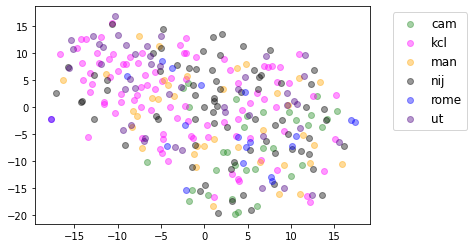

In [366]:
color_dict = {'rome': 'blue', 'cam': 'forestgreen', 'kcl': 'magenta', 
              'man':'orange', 'nij': 'black', 'ut': 'indigo'}
arr = X_embedded_all_sites

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(label):
    ix = np.where(np.array(label) == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    ax.scatter(x, y, c = color_dict[g], label = g, alpha=0.4)


#plt.axis('off')    
ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X_all_sites, np.array(label), test_size=0.33, random_state=42, stratify=label)

clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         cam       0.40      0.36      0.38        11
         kcl       0.62      0.77      0.69        30
         man       0.14      0.08      0.11        12
         nij       0.61      0.56      0.58        25
        rome       0.50      0.33      0.40         6
          ut       0.33      0.40      0.36        15

    accuracy                           0.51        99
   macro avg       0.43      0.42      0.42        99
weighted avg       0.48      0.51      0.49        99



In [368]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_all_sites, np.array(label))

LinearDiscriminantAnalysis()

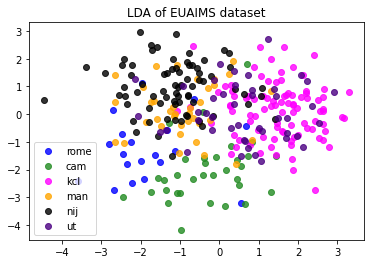

In [375]:
X_r2 = clf.transform(X_all_sites)
y = np.array(label)

target_names = ['rome', 'cam', 'kcl', 'man', 'nij', 'ut']
colors = ['blue', 'forestgreen', 'magenta', 
              'orange', 'black', 'indigo']
for color, i, target_name in zip(colors, ['rome', 'cam', 'kcl', 'man', 'nij', 'ut'], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of EUAIMS dataset")

plt.show()

In [372]:
X_r2

array([[-2.24603588, -1.00906419, -2.12759161,  1.09330543,  2.09891676],
       [-2.8155595 , -1.08118548, -4.03953402,  0.07531925, -0.40257505],
       [-1.50616945, -1.71482552, -2.71066999,  0.37285603,  0.69335512],
       ...,
       [ 1.44271224,  0.6682269 ,  1.37700984, -2.58144554, -1.5235043 ],
       [-0.91344329,  0.99778426,  0.33020544, -0.23229015, -1.2598886 ],
       [ 0.46290716, -0.39313895,  0.54711625, -2.1283592 , -0.95131118]])

### Age effect

In [303]:
labels_aims = pd.read_csv('/neurospin/dico/lguillon/aims_detection/info_subjects.csv')
ctrl = labels_aims[labels_aims['t1_diagnosis']=='Control']
ctrl["t1_ageyrs"] = [float(str(i).replace(",", ".")) for i in ctrl["t1_ageyrs"]]
label = ctrl.t1_ageyrs

data_dir = "/neurospin/dico/data/deep_folding/current/datasets/euaims/crops/SC/no_mask/Rdistmaps/"
filenames_aims = np.load(os.path.join(data_dir, "sub_id.npy"))
filenames_aims = np.array([re.search('\d{12}', filenames_aims[k]).group(0) for k in range(len(filenames_aims))])

distmaps_ctrl = np.load(os.path.join(data_dir, "distmap_1mm.npy"), mmap_mode='r')

ctrl_list = [str(sub) for sub in ctrl.subjects if str(sub) in filenames_aims]
ctrl_list = np.array(ctrl_list)
sorter = np.argsort(filenames_aims)
filenames_idx = sorter[np.searchsorted(filenames_aims, ctrl_list, sorter=sorter)]
filenames_ctrl = filenames_aims[filenames_idx]
filenames_ctrl = np.array([re.search('\d{12}', filenames_ctrl[k]).group(0) for k in range(len(filenames_ctrl))])
distmaps_ctrl = distmaps_ctrl[filenames_idx]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [261]:
subset_aims_ctrl = SkeletonDataset(dataframe=distmaps_ctrl, filenames=filenames_ctrl, data_transforms=False)

In [262]:
aims_loader = torch.utils.data.DataLoader(
                          subset_aims_ctrl,
                          batch_size=844,
                          num_workers=8,
                          shuffle=False)

In [263]:
for inputs, path in tqdm(aims_loader):
    X_aims = inputs

100%|██████████| 1/1 [00:23<00:00, 23.50s/it]


In [313]:
X_aims = X_aims.numpy().squeeze()
X_aims = np.array([X_aims[k].flatten() for k in range(len(X_aims))])

In [309]:
label = [list(ctrl[ctrl.subjects==int(filenames_ctrl[k])].t1_ageyrs)[0] for k in range(len(filenames_ctrl))]

In [335]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_aims, np.array(label), test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

In [377]:
y_test

array(['nij', 'kcl', 'rome', 'nij', 'ut', 'ut', 'cam', 'kcl', 'cam',
       'man', 'man', 'ut', 'nij', 'cam', 'kcl', 'kcl', 'cam', 'rome',
       'kcl', 'ut', 'rome', 'ut', 'nij', 'man', 'ut', 'man', 'nij', 'nij',
       'cam', 'nij', 'kcl', 'man', 'man', 'ut', 'cam', 'kcl', 'ut', 'kcl',
       'kcl', 'kcl', 'rome', 'cam', 'ut', 'man', 'nij', 'nij', 'nij',
       'kcl', 'nij', 'kcl', 'nij', 'man', 'kcl', 'nij', 'kcl', 'kcl',
       'kcl', 'ut', 'kcl', 'nij', 'ut', 'nij', 'nij', 'ut', 'kcl', 'nij',
       'kcl', 'nij', 'rome', 'man', 'nij', 'kcl', 'nij', 'cam', 'nij',
       'kcl', 'kcl', 'ut', 'nij', 'nij', 'nij', 'cam', 'kcl', 'ut', 'kcl',
       'cam', 'rome', 'ut', 'kcl', 'cam', 'man', 'kcl', 'kcl', 'kcl',
       'man', 'man', 'nij', 'kcl', 'kcl'], dtype='<U4')

In [376]:
y_train

array(['ut', 'man', 'cam', 'rome', 'man', 'nij', 'rome', 'kcl', 'ut',
       'kcl', 'nij', 'ut', 'man', 'man', 'cam', 'kcl', 'kcl', 'kcl', 'ut',
       'nij', 'nij', 'man', 'nij', 'ut', 'ut', 'nij', 'kcl', 'kcl', 'man',
       'nij', 'cam', 'ut', 'kcl', 'cam', 'nij', 'kcl', 'ut', 'nij', 'nij',
       'ut', 'man', 'nij', 'kcl', 'kcl', 'man', 'rome', 'kcl', 'man',
       'nij', 'ut', 'rome', 'rome', 'kcl', 'rome', 'nij', 'nij', 'ut',
       'kcl', 'cam', 'kcl', 'kcl', 'man', 'rome', 'kcl', 'kcl', 'ut',
       'nij', 'kcl', 'ut', 'kcl', 'kcl', 'kcl', 'cam', 'cam', 'cam',
       'kcl', 'man', 'man', 'man', 'kcl', 'ut', 'nij', 'cam', 'ut', 'nij',
       'nij', 'man', 'kcl', 'kcl', 'kcl', 'rome', 'kcl', 'cam', 'ut',
       'kcl', 'nij', 'nij', 'nij', 'nij', 'kcl', 'kcl', 'kcl', 'rome',
       'nij', 'man', 'nij', 'ut', 'kcl', 'nij', 'nij', 'nij', 'ut', 'nij',
       'kcl', 'nij', 'ut', 'kcl', 'man', 'man', 'cam', 'man', 'ut', 'kcl',
       'cam', 'cam', 'nij', 'ut', 'kcl', 'cam', 'kcl', 'kcl

In [355]:
from sklearn.metrics import r2_score

In [357]:
r2_score(y_test, pred)

-1.5541835187847162

In [358]:
from sklearn.metrics import mean_squared_error

In [359]:
mean_squared_error(y_test, pred)

50.90673374627535

ValueError: x and y must be the same size

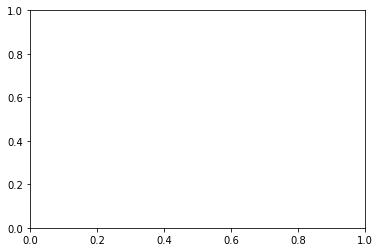

In [360]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()